In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('mercedes-benz-greener-manufacturing/train.csv')
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test = pd.read_csv('mercedes-benz-greener-manufacturing/test.csv')
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
oe = preprocessing.OrdinalEncoder()

encoder = df_train.drop(['y','ID'], axis=1)
encoder1 = encoder.select_dtypes(exclude='int64')

encoder1 = oe.fit_transform(encoder1)
encoder2 = encoder.select_dtypes(include='int64')

encodedvals = np.append(encoder1,encoder2,axis=1)

encodedframe = pd.DataFrame(encodedvals.astype('int'))
encodedframe.head()

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pca = PCA(30) 
pcacols = pca.fit_transform(encodedvals)

In [8]:
scaler = StandardScaler()
scaler.fit(pcacols)
pcascaled = scaler.transform(pcacols)

In [9]:
pca.explained_variance_ratio_

array([3.83347821e-01, 2.13880326e-01, 1.32618659e-01, 1.18266425e-01,
       9.20600842e-02, 1.59060433e-02, 7.44539716e-03, 4.33701278e-03,
       2.94020637e-03, 2.41796178e-03, 2.36488035e-03, 2.03228597e-03,
       1.67203776e-03, 1.48111202e-03, 1.28702378e-03, 1.03575260e-03,
       9.57334243e-04, 8.96963711e-04, 7.85687495e-04, 7.09719878e-04,
       6.44381958e-04, 6.23812974e-04, 5.84619637e-04, 5.12442677e-04,
       4.84777857e-04, 4.33104905e-04, 4.13933822e-04, 3.77640706e-04,
       3.68600585e-04, 3.56065643e-04])

In [10]:
sum(pca.explained_variance_ratio_)

0.991242114768822

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

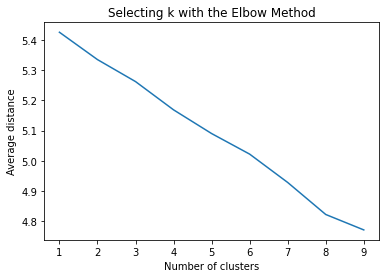

In [11]:
clusters=range(1,10)
meandist=[]

data = pcascaled
# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1))
    / data.shape[0])

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 

In [12]:
k = KMeans(n_clusters=3, random_state=0)
kfit = k.fit(data)
kpred = kfit.predict(data)

In [13]:
pcascaleddf = pd.DataFrame(pcascaled)

In [14]:
pcascaleddf['klabel'] = pd.Series(kpred,index=encodedframe.index)
pcascaleddf['y'] = df_train['y']
pcascaleddf['ID'] = df_train['ID']

In [15]:
pcascaleddf

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,klabel,y,ID
0,0.043045,-0.012468,1.859985,0.464853,0.194256,-0.925139,1.917589,1.012230,-0.517824,1.531838,...,-2.511414,0.324152,-0.157412,2.880902,2.968300,-1.480987,-0.109080,2,130.81,0
1,0.039589,0.146264,2.132013,-0.011711,0.219556,-1.527179,-0.400194,0.534901,-0.631019,-0.120398,...,0.940912,-0.511673,-1.222304,3.057720,0.998481,-1.715303,-0.412428,2,88.53,6
2,1.134413,1.152322,2.099152,0.023486,1.693244,-0.740886,0.416096,1.040530,-0.486254,-0.427813,...,0.488173,2.703377,0.771819,0.215648,-0.458694,-0.550161,0.118577,0,76.26,7
3,1.130792,1.268800,1.773588,-0.395943,-0.976183,-1.474635,-1.118338,1.381792,0.032745,-0.863297,...,-0.173166,2.947123,-1.617094,-0.443576,0.978307,0.071610,0.057317,0,80.62,9
4,1.152435,1.235015,0.524159,0.967023,0.305751,1.293776,-0.981761,1.384796,0.942119,-0.900933,...,-0.063171,1.095179,-0.151527,0.933565,-0.381692,0.281206,-0.307036,0,78.02,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1.551699,-0.673453,-1.030843,1.358275,0.667235,1.212672,0.923777,-0.900796,-0.795076,0.318930,...,2.420671,-1.445389,1.117516,-0.401271,1.075533,1.367215,0.321951,2,107.39,8405
4205,0.430888,2.139893,-0.989803,1.298820,-0.441395,0.025306,-0.051891,0.476005,0.706335,1.743703,...,1.014617,0.243286,0.965056,0.746662,-1.551308,0.512603,1.963577,2,108.77,8406
4206,2.030851,1.393050,-0.922981,1.414946,-0.835417,0.271313,1.708166,-0.166526,0.211515,-0.965925,...,0.171356,0.329050,-0.460529,-0.078118,-0.630673,0.330791,0.089279,1,109.22,8412
4207,1.608485,0.157934,-1.075108,1.229057,1.350152,-1.497051,-1.356285,1.131494,1.791559,0.224830,...,0.757734,-0.956097,-0.130187,0.307727,-2.275361,2.032529,0.788437,0,87.48,8415


In [16]:
label = []
for x in range(3):
    label.append(pcascaleddf.loc[pcascaleddf['klabel']==x])

In [17]:
for x in label:
    print(len(x))

1314
1341
1554


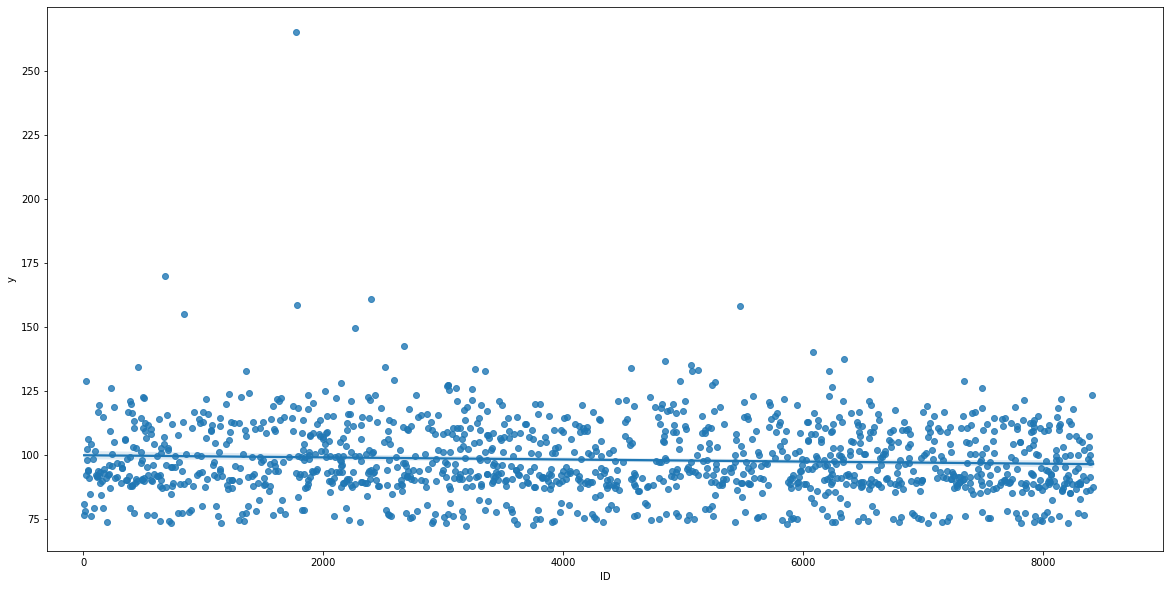

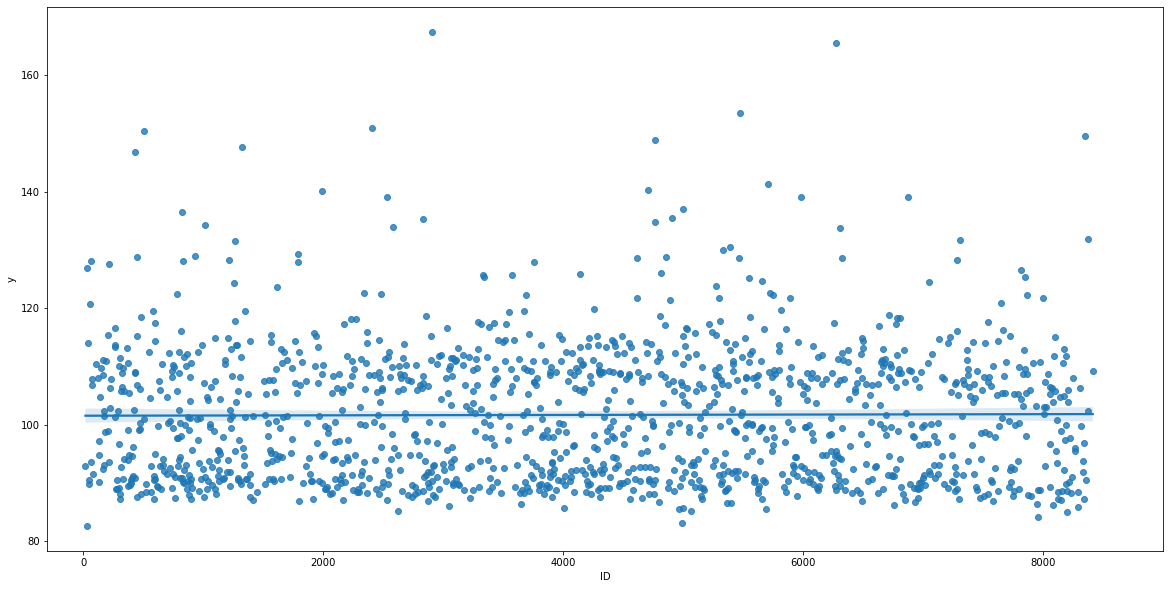

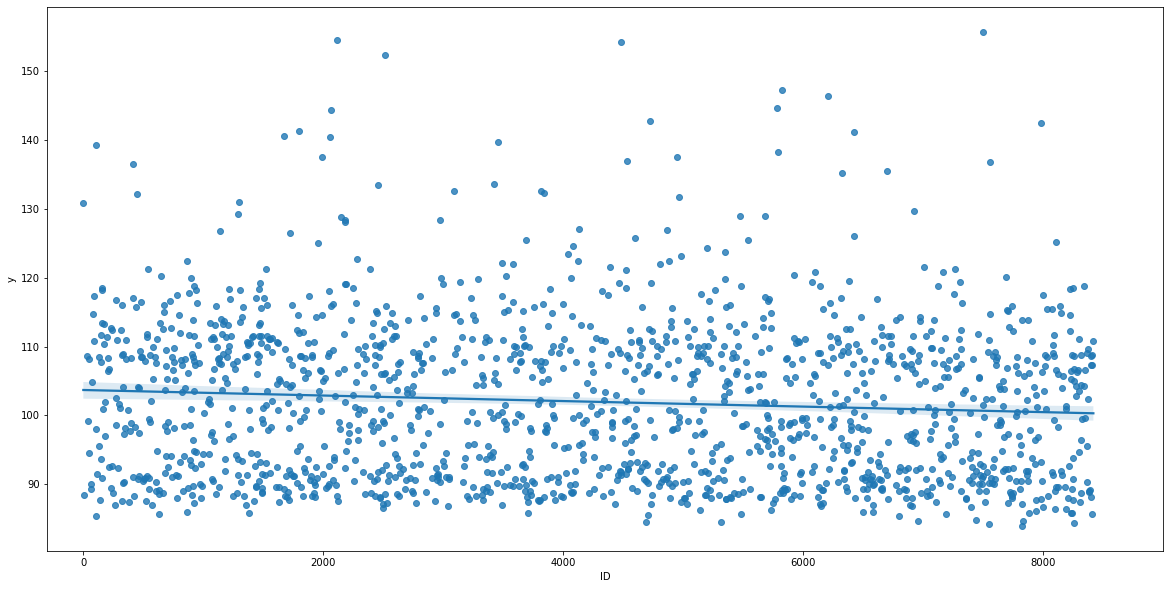

In [18]:
for x in label:
    plt.figure(figsize=(20,10))
    plt.xlim([-300,9000])
    sns.regplot(data=x, x='ID', y='y') #found outlier
plt.show()

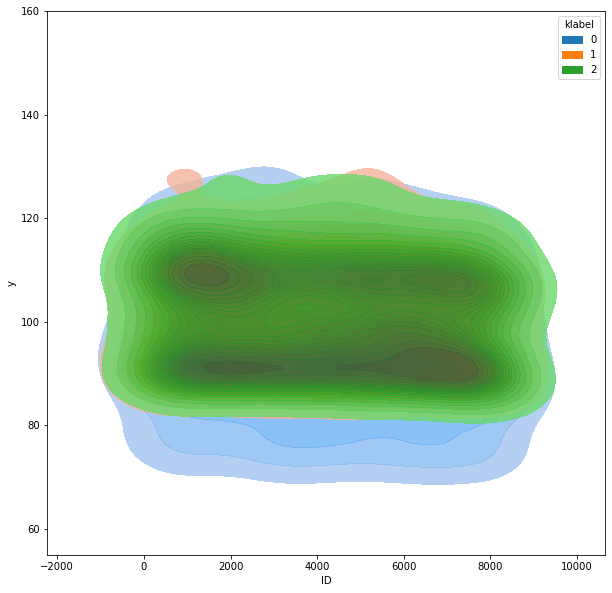

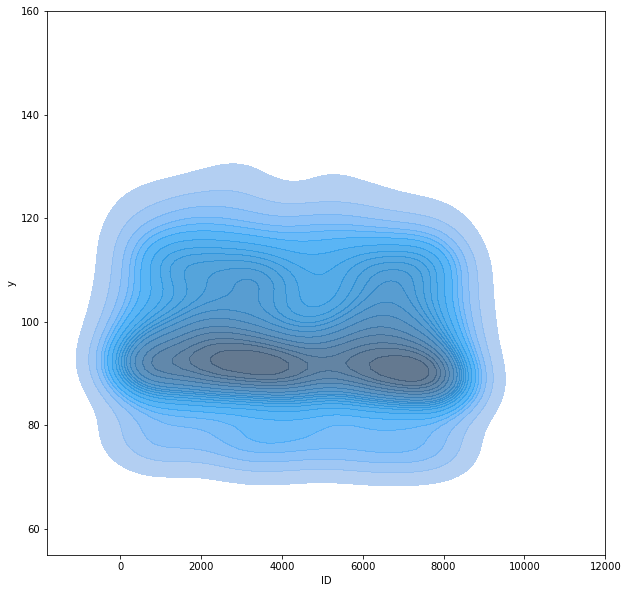

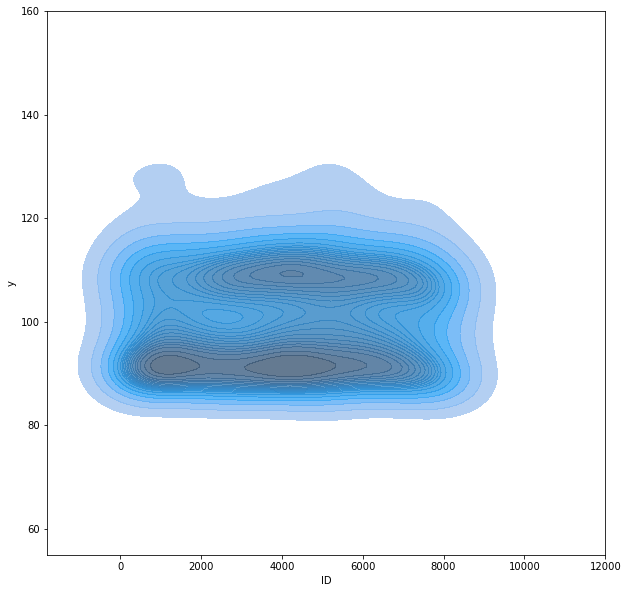

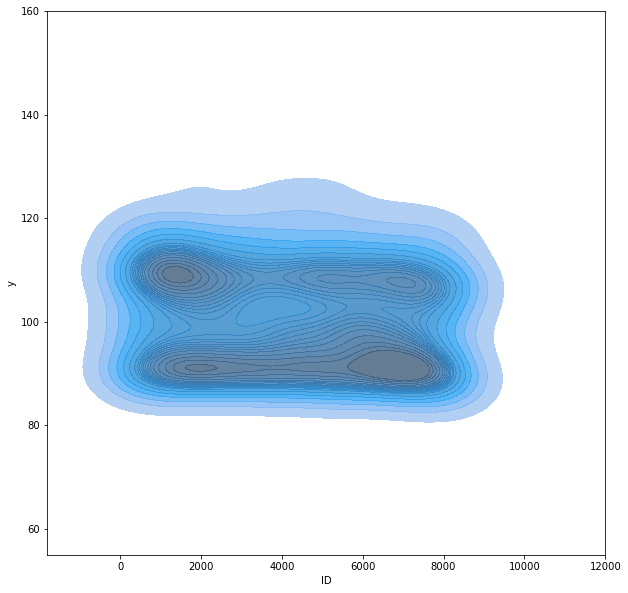

In [19]:
# colors = ['firebrick', 'steelblue', 'darkgreen', 'darkslategray'] #'darkslategray'

plt.figure(figsize=(10,10))
sns.kdeplot(data=pcascaleddf, x='ID', y='y', levels=20, fill=True, alpha=0.8, hue='klabel', palette='tab10')
plt.ylim([55,160])
plt.show()

for x in label:
    plt.figure(figsize=(10,10))
    sns.kdeplot(data=x, x='ID', y='y', levels=20, fill=True, alpha=0.8)
    plt.ylim([55,160])
    plt.xlim([-1800,12000])
    plt.show()

In [26]:
label[0] = label[0].drop(label[0].loc[label[0]['y'] > 250].index) #drop outlier

In [286]:
x1 = label[0].iloc[:,:-3]

In [287]:
y1 = label[0]['y']

In [288]:
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
x_train, x_valid, y_train, y_valid = train_test_split(x1, y1, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test_1)

params = {}
params['objective'] = 'reg:squarederror'
params['eta'] = 0.01
params['max_depth'] = 1

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 8000, watchlist, early_stopping_rounds=80, feval=xgb_r2_score, maximize=True, verbose_eval=10)

NameError: name 'test_1' is not defined

In [164]:
p_test = clf.predict(d_test)

In [283]:
output = pd.DataFrame({'id': df_test['ID'].astype(np.int32), 'y': p_test})
output.to_csv('xgboost-depth{}-pca-ica.csv'.format(xgb_params['max_depth']), index=False)

NameError: name 'p_test' is not defined

In [170]:
clf

In [ ]:
def xgb_test(data):
    
    x1 = data.iloc[:,:-3]
    y1 = data['y']
    
    x_train, x_valid, y_train, y_valid = train_test_split(x1, y1, test_size=0.2, random_state=4242)

    d_train = xgb.DMatrix(x_train, label=y_train)
    d_valid = xgb.DMatrix(x_valid, label=y_valid)
    # d_test = xgb.DMatrix(test_1)

    params = {}
    params['objective'] = 'reg:squarederror'
    params['eta'] = 0.01
    params['max_depth'] = 1

    def xgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds)

    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    clf = xgb.train(params, d_train, 8000, watchlist, early_stopping_rounds=80, feval=xgb_r2_score, maximize=True, verbose_eval=10)
    
    return clf

[2214]	train-rmse:7.54455	valid-rmse:8.72988	train-r2:0.702157	valid-r2:0.61052

In [ ]:
from sklearn.svm import SVR

In [153]:
def svm_test(data):
    scores = []        
    x1 = data.iloc[:,:-2]
    y1 = data['y']
    x_train, x_valid, y_train, y_valid = train_test_split(x1, y1, test_size=0.2, random_state=4242)
        
    svr=SVR(kernel = 'rbf', C=3) 
    svr.fit(x_train,y_train)
                
    scores.append(svr.score(x_valid, y_valid))
    
    plt.plot(x_valid, svr.predict(x_valid))
    plt.scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    return scores

In [154]:
scores = svm_test(emb_df)

In [155]:
print(scores)

[0.48060700813766055, 0.5090126242408544]


In [190]:
from sklearn.neighbors import KNeighborsRegressor

x_1 = label[1].iloc[:,:-3]
y_1 = label[1]['y']

x1_train, x1_valid, y1_train, y1_valid = train_test_split(x_1, y_1, test_size=0.2, random_state=4242)

neigh = KNeighborsRegressor(n_neighbors=15, weights='uniform')
neigh.fit(x1_train, y1_train)
neigh.score(x1_valid,y1_valid)

0.4083942942390716

In [194]:
import umap

In [391]:
reducer = umap.UMAP(n_neighbors=5)

In [392]:
scaler.fit(encodedframe)
enscaled = scaler.transform(encodedframe)

In [393]:
embedding = reducer.fit_transform(enscaled)
embedding.shape

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(4209, 2)

In [394]:
k = KMeans(n_clusters=2, random_state=42)
kfit = k.fit(embedding)
kpred = kfit.predict(embedding)

In [395]:
emb_df = pd.DataFrame(embedding)
emb_df['klabels'] = pd.Series(kpred,index=encodedframe.index)
emb_df['y']= df_train['y']

In [396]:
emb_df.iloc[:,:-2]

,0,1
0,10.010253,-9.117292
1,4.929009,12.764198
2,2.015042,15.916142
3,-4.675613,15.603731
4,-4.901834,15.376074
...,...,...
4204,-1.203768,-7.098046
4205,18.639486,8.003916
4206,-1.582863,8.849854
4207,0.185303,4.359510


Text(0.5, 1.0, 'UMAP projection of the Mercedes-Benz dataset')

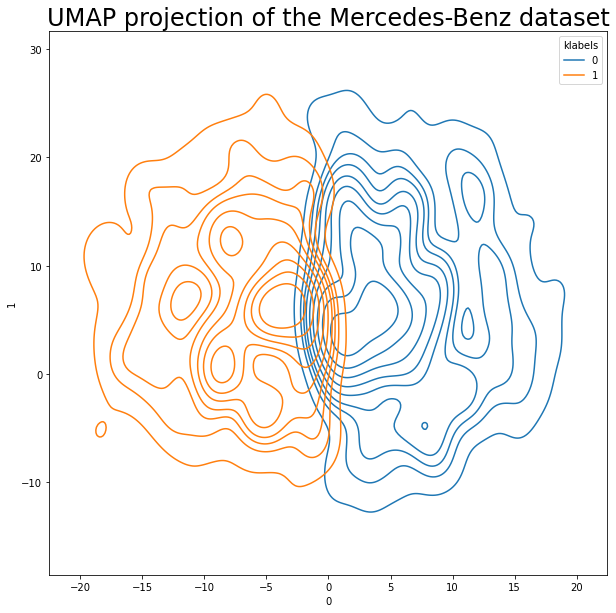

In [397]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=emb_df,
    x = emb_df.iloc[:, 0],
    y = emb_df.iloc[:, 1],
    hue= 'klabels', fill=False, palette='tab10')#[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

plt.title('UMAP projection of the Mercedes-Benz dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Mercedes-Benz dataset')

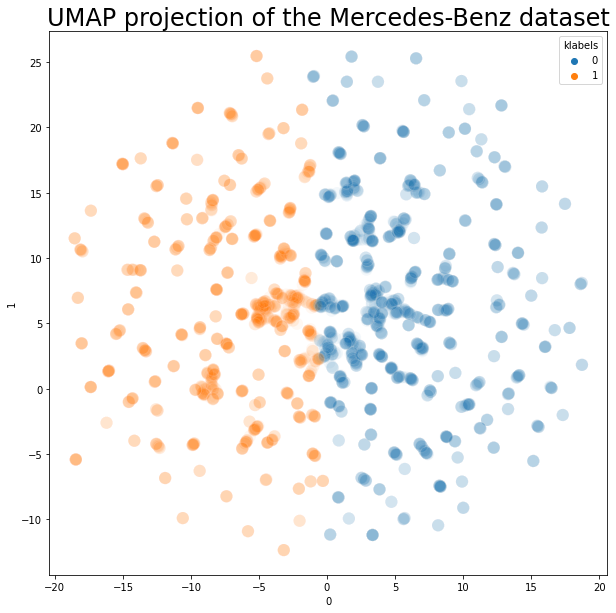

In [398]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=emb_df,
    x = emb_df.iloc[:, 0],
    y = emb_df.iloc[:, 1],
    hue= 'klabels', palette='tab10', s=150,alpha=0.05)#[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

plt.title('UMAP projection of the Mercedes-Benz dataset', fontsize=24)

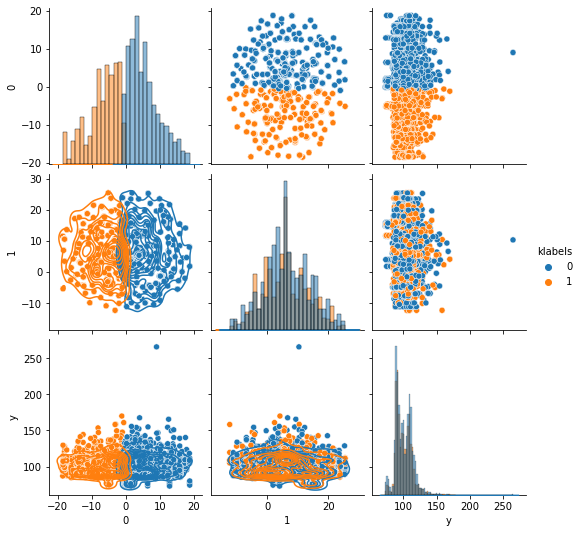

In [403]:
g = sns.pairplot(data=emb_df, hue='klabels')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

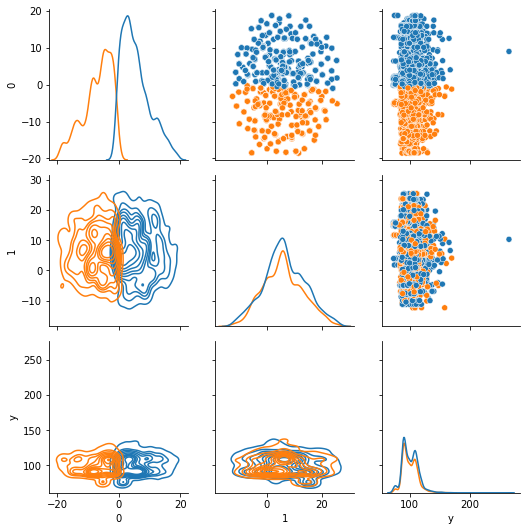

In [410]:
g = sns.PairGrid(emb_df, hue='klabels')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

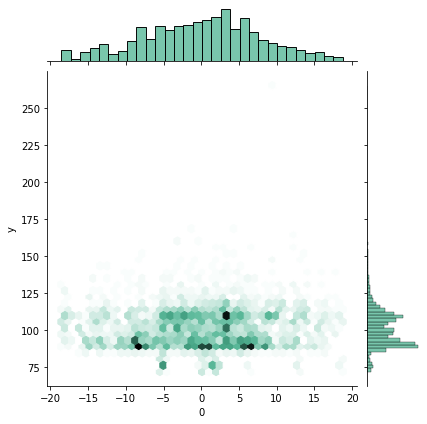

In [411]:
sns.jointplot(x=emb_df[0], y=emb_df['y'], kind="hex", color="#4CB391")

In [362]:
label = []
for x in range(2):
    label.append(emb_df.loc[emb_df['klabels']==x])

<AxesSubplot:xlabel='1', ylabel='y'>

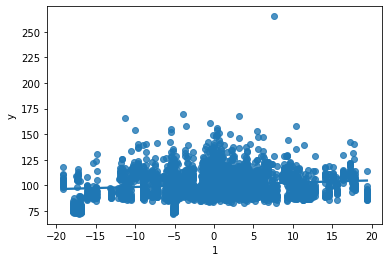

In [381]:
sns.regplot(data=emb_df, x=emb_df[1], y='y')

Text(0.5, 1.0, 'UMAP KClustering')

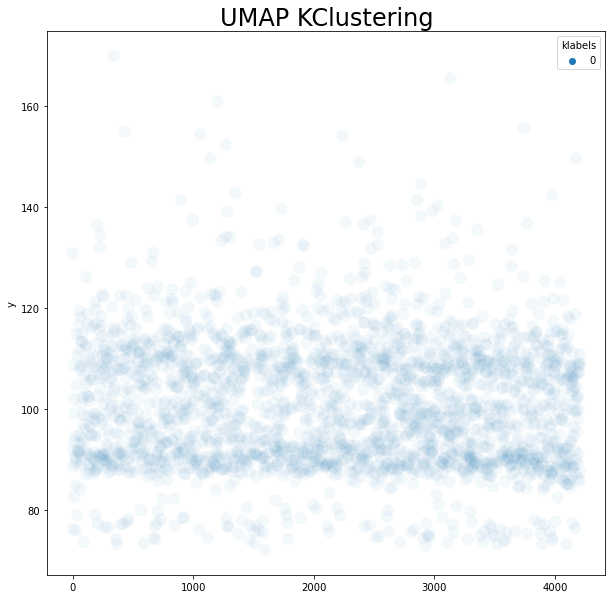

In [365]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=label[0],
    x =label[0].index,
    y = label[0]['y'],
    hue= 'klabels', palette='tab10', s=150,alpha=0.05)#[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

plt.title('UMAP KClustering', fontsize=24)

Text(0.5, 1.0, 'UMAP KClustering')

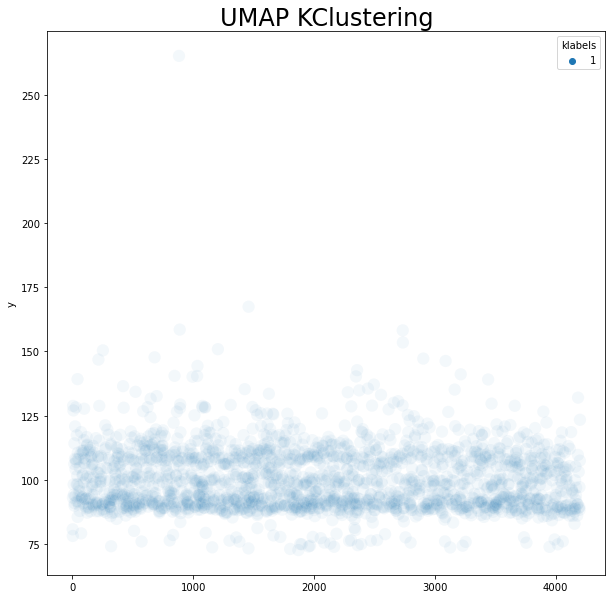

In [367]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=label[1],
    x =label[1].index,
    y = label[1]['y'],
    hue= 'klabels', palette='tab10', s=150,alpha=0.05)#[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

plt.title('UMAP KClustering', fontsize=24)

In [334]:
emb_df.iloc[:,:-1]

,0,1,klabels
0,-2.153536,-14.884529,0
1,0.549963,-2.901110,0
2,5.582757,-16.882380,0
3,-14.426014,-5.021113,1
4,-14.313736,-4.979643,1
...,...,...,...
4204,6.172250,1.064432,0
4205,16.339062,15.114594,0
4206,1.389737,-10.109838,0
4207,0.515584,-0.761034,0


In [359]:
def runXGBOOST(data):
    x1 = data.iloc[:,:-1]
    y1 = data['y']
    
    x_train, x_valid, y_train, y_valid = train_test_split(x1, y1, test_size=0.2, random_state=4242)

    d_train = xgb.DMatrix(x_train, label=y_train)
    d_valid = xgb.DMatrix(x_valid, label=y_valid)
    # d_test = xgb.DMatrix(test_1)

    params = {}
    params['objective'] = 'reg:squarederror'
    params['eta'] = 0.1
    params['max_depth'] = 1
    params['gamma'] = 1
    params['min_child_weight'] = 0.1

    def xgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds)

    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    clf = xgb.train(params, d_train, 100000, watchlist, early_stopping_rounds=500, feval=xgb_r2_score, maximize=True, verbose_eval=10)

In [360]:
runXGBOOST(emb_df)

[0]	train-rmse:91.1975	valid-rmse:90.3044	train-r2:-49.2155	valid-r2:-56.9695
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 500 rounds.
[10]	train-rmse:33.8842	valid-rmse:32.7918	train-r2:-5.93213	valid-r2:-6.64385
[20]	train-rmse:16.5325	valid-rmse:15.1514	train-r2:-0.650254	valid-r2:-0.631868
[30]	train-rmse:12.8437	valid-rmse:11.4493	train-r2:0.004013	valid-r2:0.068157
[40]	train-rmse:12.2558	valid-rmse:10.9533	train-r2:0.093117	valid-r2:0.147147
[50]	train-rmse:12.1264	valid-rmse:10.8586	train-r2:0.112158	valid-r2:0.161831
[60]	train-rmse:12.0619	valid-rmse:10.8014	train-r2:0.121581	valid-r2:0.170638
[70]	train-rmse:12.0103	valid-rmse:10.7556	train-r2:0.129075	valid-r2:0.177653
[80]	train-rmse:11.9653	valid-rmse:10.7036	train-r2:0.135593	valid-r2:0.185589
[90]	train-rmse:11.9251	valid-rmse:10.6558	train-r2:0.141393	valid-r2:0.192858
[100]	train-rmse:11.8887	valid-rmse:10.6138	train-r2:0.146621	valid

[1020]	train-rmse:11.1085	valid-rmse:9.90771	train-r2:0.254958	valid-r2:0.302204
[1030]	train-rmse:11.1051	valid-rmse:9.90356	train-r2:0.255415	valid-r2:0.302789
[1040]	train-rmse:11.1017	valid-rmse:9.90304	train-r2:0.25587	valid-r2:0.302861
[1050]	train-rmse:11.0983	valid-rmse:9.90153	train-r2:0.256322	valid-r2:0.303074
[1060]	train-rmse:11.095	valid-rmse:9.89967	train-r2:0.25677	valid-r2:0.303336
[1070]	train-rmse:11.0916	valid-rmse:9.89469	train-r2:0.257214	valid-r2:0.304037
[1080]	train-rmse:11.0884	valid-rmse:9.89168	train-r2:0.257651	valid-r2:0.30446
[1090]	train-rmse:11.0851	valid-rmse:9.88938	train-r2:0.258085	valid-r2:0.304783
[1100]	train-rmse:11.0819	valid-rmse:9.88584	train-r2:0.258519	valid-r2:0.305281
[1110]	train-rmse:11.0787	valid-rmse:9.88527	train-r2:0.258945	valid-r2:0.305361
[1120]	train-rmse:11.0755	valid-rmse:9.88294	train-r2:0.259369	valid-r2:0.305689
[1130]	train-rmse:11.0724	valid-rmse:9.88125	train-r2:0.259789	valid-r2:0.305926
[1140]	train-rmse:11.0693	valid-

[2040]	train-rmse:10.8631	valid-rmse:9.7347	train-r2:0.287504	valid-r2:0.326361
[2050]	train-rmse:10.8614	valid-rmse:9.73558	train-r2:0.287728	valid-r2:0.326239
[2060]	train-rmse:10.8597	valid-rmse:9.73284	train-r2:0.287952	valid-r2:0.326618
[2070]	train-rmse:10.858	valid-rmse:9.73236	train-r2:0.288174	valid-r2:0.326686
[2080]	train-rmse:10.8564	valid-rmse:9.732	train-r2:0.288392	valid-r2:0.326734
[2090]	train-rmse:10.8547	valid-rmse:9.73096	train-r2:0.288613	valid-r2:0.326878
[2100]	train-rmse:10.853	valid-rmse:9.72842	train-r2:0.288832	valid-r2:0.327229
[2110]	train-rmse:10.8513	valid-rmse:9.72744	train-r2:0.289052	valid-r2:0.327365
[2120]	train-rmse:10.8497	valid-rmse:9.72686	train-r2:0.289263	valid-r2:0.327445
[2130]	train-rmse:10.8481	valid-rmse:9.72548	train-r2:0.289476	valid-r2:0.327637
[2140]	train-rmse:10.8465	valid-rmse:9.7237	train-r2:0.289692	valid-r2:0.327883
[2150]	train-rmse:10.8448	valid-rmse:9.72327	train-r2:0.289903	valid-r2:0.327942
[2160]	train-rmse:10.8432	valid-rm

[3060]	train-rmse:10.7217	valid-rmse:9.64075	train-r2:0.305937	valid-r2:0.339301
[3070]	train-rmse:10.7205	valid-rmse:9.63984	train-r2:0.306089	valid-r2:0.339425
[3080]	train-rmse:10.7194	valid-rmse:9.63873	train-r2:0.306239	valid-r2:0.339579
[3090]	train-rmse:10.7182	valid-rmse:9.63865	train-r2:0.306388	valid-r2:0.339589
[3100]	train-rmse:10.7171	valid-rmse:9.63758	train-r2:0.306537	valid-r2:0.339736
[3110]	train-rmse:10.7159	valid-rmse:9.63616	train-r2:0.306687	valid-r2:0.33993
[3120]	train-rmse:10.7148	valid-rmse:9.63614	train-r2:0.306834	valid-r2:0.339933
[3130]	train-rmse:10.7136	valid-rmse:9.63517	train-r2:0.30698	valid-r2:0.340066
[3140]	train-rmse:10.7125	valid-rmse:9.6342	train-r2:0.307129	valid-r2:0.340199
[3150]	train-rmse:10.7113	valid-rmse:9.63306	train-r2:0.307276	valid-r2:0.340354
[3160]	train-rmse:10.7102	valid-rmse:9.63302	train-r2:0.307422	valid-r2:0.340361
[3170]	train-rmse:10.7091	valid-rmse:9.63176	train-r2:0.307569	valid-r2:0.340533
[3180]	train-rmse:10.708	valid-

[4080]	train-rmse:10.6183	valid-rmse:9.57918	train-r2:0.319255	valid-r2:0.347713
[4090]	train-rmse:10.6174	valid-rmse:9.5786	train-r2:0.319369	valid-r2:0.347792
[4100]	train-rmse:10.6166	valid-rmse:9.57893	train-r2:0.319482	valid-r2:0.347747
[4110]	train-rmse:10.6157	valid-rmse:9.57863	train-r2:0.319595	valid-r2:0.347788
[4120]	train-rmse:10.6148	valid-rmse:9.57813	train-r2:0.319707	valid-r2:0.347856
[4130]	train-rmse:10.6139	valid-rmse:9.57699	train-r2:0.319819	valid-r2:0.348011
[4140]	train-rmse:10.6131	valid-rmse:9.57595	train-r2:0.319931	valid-r2:0.348153
[4150]	train-rmse:10.6122	valid-rmse:9.57558	train-r2:0.320043	valid-r2:0.348204
[4160]	train-rmse:10.6113	valid-rmse:9.57494	train-r2:0.320154	valid-r2:0.348291
[4170]	train-rmse:10.6105	valid-rmse:9.5748	train-r2:0.320265	valid-r2:0.34831
[4180]	train-rmse:10.6096	valid-rmse:9.57514	train-r2:0.320375	valid-r2:0.348263
[4190]	train-rmse:10.6087	valid-rmse:9.57435	train-r2:0.320485	valid-r2:0.348371
[4200]	train-rmse:10.6079	valid

[5100]	train-rmse:10.5378	valid-rmse:9.53801	train-r2:0.329544	valid-r2:0.353308
[5110]	train-rmse:10.5371	valid-rmse:9.53809	train-r2:0.329634	valid-r2:0.353297
[5120]	train-rmse:10.5364	valid-rmse:9.53816	train-r2:0.329723	valid-r2:0.353288
[5130]	train-rmse:10.5357	valid-rmse:9.53766	train-r2:0.329814	valid-r2:0.353355
[5140]	train-rmse:10.535	valid-rmse:9.53759	train-r2:0.329904	valid-r2:0.353365
[5150]	train-rmse:10.5343	valid-rmse:9.53784	train-r2:0.329994	valid-r2:0.353331
[5160]	train-rmse:10.5336	valid-rmse:9.53718	train-r2:0.330083	valid-r2:0.35342
[5170]	train-rmse:10.5328	valid-rmse:9.53648	train-r2:0.330173	valid-r2:0.353515
[5180]	train-rmse:10.5321	valid-rmse:9.5361	train-r2:0.330262	valid-r2:0.353567
[5190]	train-rmse:10.5314	valid-rmse:9.53587	train-r2:0.330352	valid-r2:0.353599
[5200]	train-rmse:10.5307	valid-rmse:9.53539	train-r2:0.330441	valid-r2:0.353663
[5210]	train-rmse:10.53	valid-rmse:9.53518	train-r2:0.33053	valid-r2:0.353692
[5220]	train-rmse:10.5293	valid-rm

[6120]	train-rmse:10.4705	valid-rmse:9.51659	train-r2:0.338083	valid-r2:0.356209
[6130]	train-rmse:10.4698	valid-rmse:9.51616	train-r2:0.338162	valid-r2:0.356267
[6140]	train-rmse:10.4692	valid-rmse:9.51572	train-r2:0.338241	valid-r2:0.356327
[6150]	train-rmse:10.4686	valid-rmse:9.51595	train-r2:0.338321	valid-r2:0.356296
[6160]	train-rmse:10.468	valid-rmse:9.51633	train-r2:0.3384	valid-r2:0.356244
[6170]	train-rmse:10.4673	valid-rmse:9.51671	train-r2:0.338479	valid-r2:0.356193
[6180]	train-rmse:10.4667	valid-rmse:9.5171	train-r2:0.338558	valid-r2:0.356141
[6190]	train-rmse:10.4661	valid-rmse:9.51748	train-r2:0.338637	valid-r2:0.356089
[6200]	train-rmse:10.4655	valid-rmse:9.51787	train-r2:0.338716	valid-r2:0.356036
[6210]	train-rmse:10.4648	valid-rmse:9.51795	train-r2:0.338795	valid-r2:0.356025
[6220]	train-rmse:10.4642	valid-rmse:9.51822	train-r2:0.338873	valid-r2:0.355989
[6230]	train-rmse:10.4636	valid-rmse:9.51772	train-r2:0.338951	valid-r2:0.356057
[6240]	train-rmse:10.463	valid-r